# DAC-ASG

### The following cell uploads 1024 points of an arbitrary signal to  RAM.


### We use the *periphery module*. Program the FPGA with the command *cat DAC-ASG.bit > /dev/xdevcfg*

### Connect the output of DAC1 to an oscilloscope.


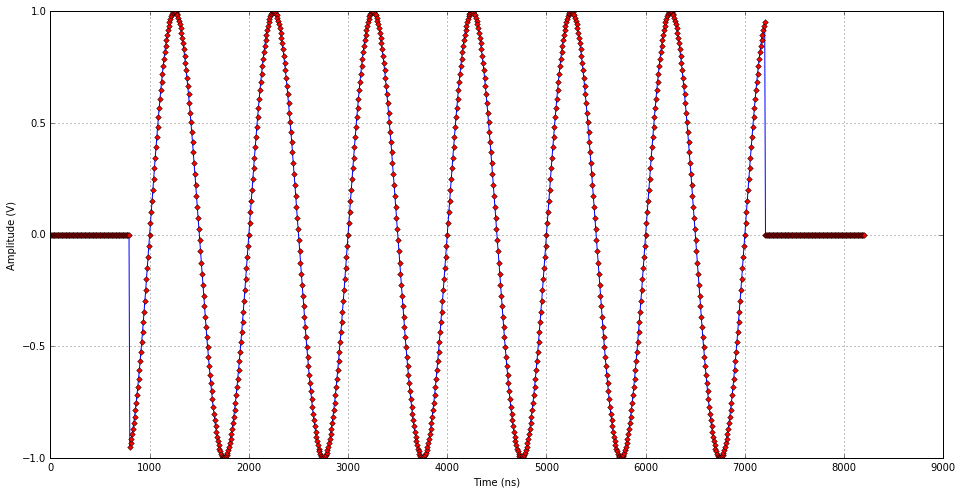

In [1]:
#!/usr/bin/python
###############################################################
PERIOD = 1000 # ns
###############################################################
PERIOD = int(PERIOD/8)
import numpy as np
from periphery import MMIO
from time import *

dat = []
####################################################################
regset = MMIO(0x41200000, 0xc)
regset.write32(0,0)   # Reset port A
regset.write32(0,1)   # Reset port A

for i in range(1024+2):
    y = np.sin(2*np.pi*i/PERIOD)
    if (i <100 or i > 900):
        y=0
    COUNTS = int(y * 2**14/(-2) + 2**13)

    regset.write32(0,COUNTS*256*256+4)
    regset.write32(0,COUNTS*256*256+1+4)
    dat.append(y)
regset.close()
####################################################################
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
fig.set_size_inches([16,8])
y = dat
x = [i*8 for i in range(len(y))]
ax1.plot(x, y, '-bD',  c='blue', mfc='red', mec='k',ms=4)
ax1.grid()
ax1.set_xlabel("Time (ns)")
ax1.set_ylabel("Amplitude (V)")
plt.show()
####################################################################

###  Send the data from RAM to channel 1 of the fast DAC once

In [28]:
import numpy as np
from periphery import MMIO

regset = MMIO(0x41200000, 0xc)
regset.write32(0,0)   # Reset port B
regset.write32(0,8)   # Reset port B
regset.close()



### The signal generated as seen in an oscilloscope with a vertical scale of 0.5 V per division is the following

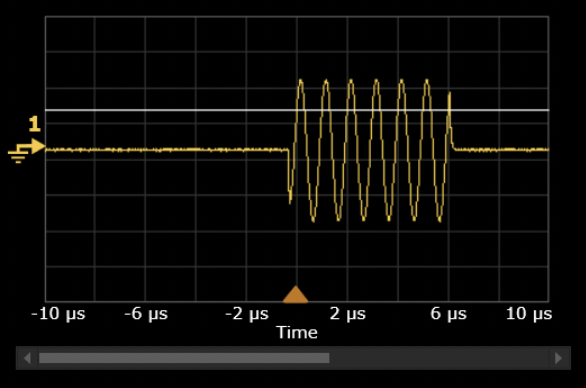

In [1]:
from IPython.display import Image
Image("3.Oscilloscope.png")

###  Send the data from RAM to channel 1 of the fast DAC 10 times once per second

In [17]:
import time 
from periphery import MMIO

regset = MMIO(0x41200000, 0xc)
for i in range(10):
    regset.write32(0,0)   # Reset port B
    regset.write32(0,8)   # Reset port B
    time.sleep(1)
regset.close()

